# Data analysis and visualization

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from mpl_toolkits.basemap import Basemap

In [2]:
# Input data from "/data" director
os.listdir("data")

['app_events.csv',
 'phone_brand_device_model.csv',
 'app_events.csv.zip',
 'app_labels.csv.zip',
 'app_labels.csv',
 'gender_age_test.csv.zip',
 'phone_brand_device_model.csv.zip',
 'gender_age_test.csv',
 'events.csv',
 'events.csv.zip',
 'sample_submission.csv.zip',
 'gender_age_train.csv.zip',
 'gender_age_train.csv',
 'label_categories.csv.zip',
 'sample_submission.csv',
 'label_categories.csv']

In [3]:
import seaborn as sns
sns.set(color_codes=True)
app_event=pd.read_csv("data/events.csv")
app_event.shape

(3252950, 5)

In [4]:
app_event.timestamp=pd.to_datetime(app_event.timestamp)
app_event['time_hour'] = app_event.timestamp.apply(lambda x: x.hour)

In [5]:
# Show frequency of events by hour
app_event['time_hour'].value_counts()

10    183839
21    181175
20    178179
22    168246
11    167025
19    166160
9     166061
12    162745
8     157896
18    156209
13    155337
17    153516
14    151379
16    150732
15    149912
7     146667
23    136339
0     120512
6     116370
1      72671
5      66411
2      53764
3      47048
4      44757
Name: time_hour, dtype: int64

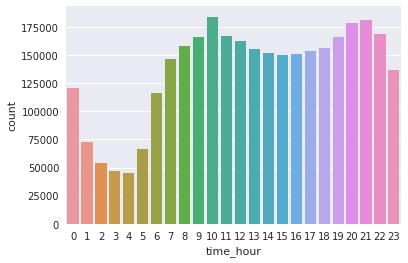

In [6]:
ax = sns.countplot(x="time_hour", data=app_event)

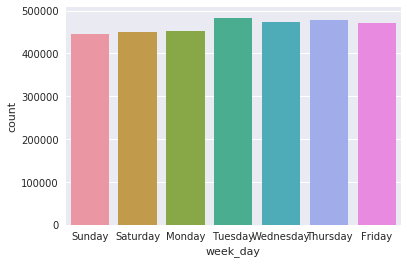

In [7]:
import calendar
app_event['week_day'] = app_event.timestamp.apply(lambda x: calendar.day_name[x.weekday()])
ax = sns.countplot(x="week_day", data=app_event)

M    47904
F    26741
Name: gender, dtype: int64


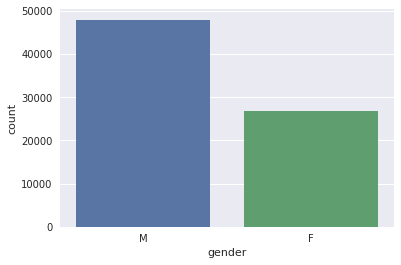

In [8]:
gender=pd.read_csv("data/gender_age_train.csv")
print(gender.gender.value_counts())
ax = sns.countplot(x="gender", data=gender)

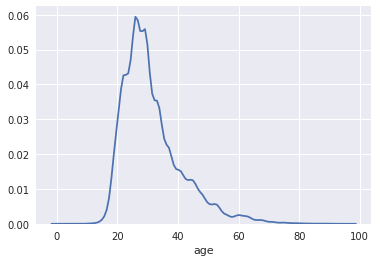

In [9]:
# Distribution by age
sns.distplot(gender.age, hist=False);

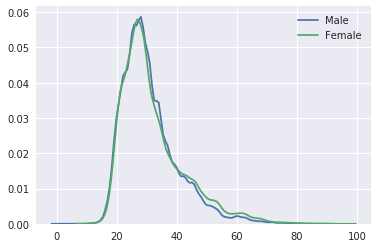

In [10]:
# Distribution by sex
sns.kdeplot(gender.age[gender.gender=="M"], label="Male")
sns.kdeplot(gender.age[gender.gender=="F"],  label="Female")
plt.legend();

Female at old age are using mobiles little bit more than males at old age

Male mobile usage count by age


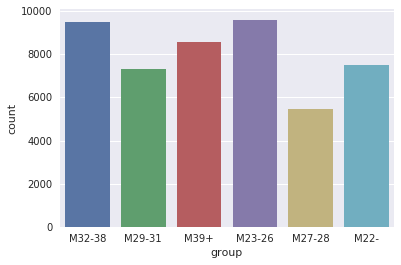

In [11]:
print("Male mobile usage count by age")
ax = sns.countplot(x="group", data=gender[gender.gender=="M"])

Female mobile usage count by age


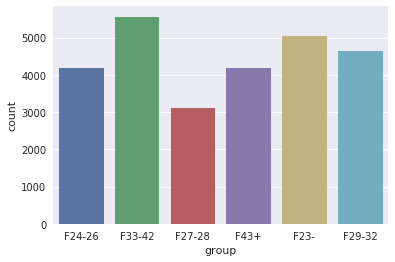

In [12]:
print("Female mobile usage count by age")
ax = sns.countplot(x="group", data=gender[gender.gender=="F"])

In [13]:
appscategories=pd.read_csv("data/label_categories.csv")
print(appscategories.head())
print(appscategories.shape)

   label_id           category
0         1                NaN
1         2     game-game type
2         3   game-Game themes
3         4     game-Art Style
4         5  game-Leisure time
(930, 2)


### Joint visualisation - male and female

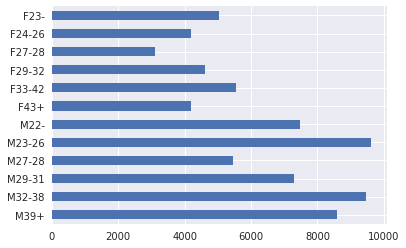

In [14]:
gender.group.value_counts().sort_index(ascending=False).plot(kind='barh')

Further break down by age

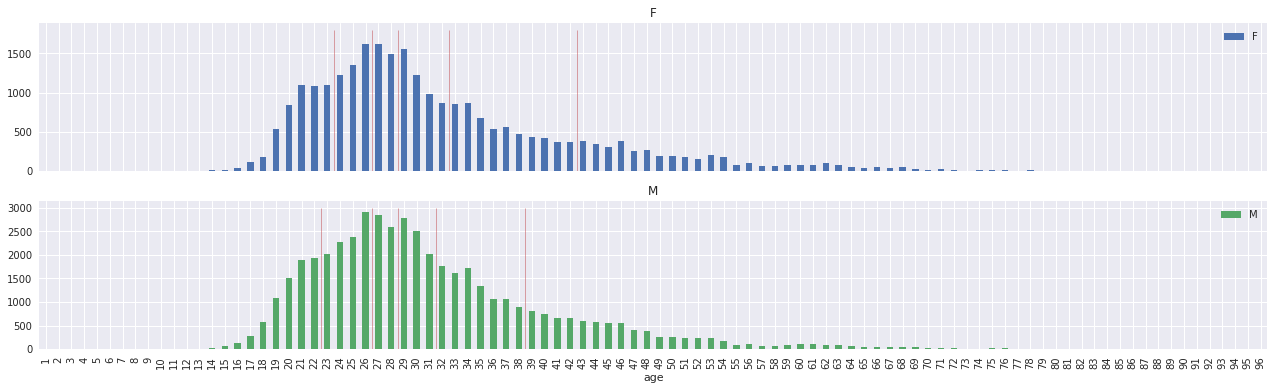

In [15]:
c = gender.groupby(['age','gender']).size().unstack().reindex(index=np.arange(gender.age.min(), gender.age.max()+1)).fillna(0)
ax1, ax2 = c.plot(kind='bar',figsize=(22,6),subplots=True);
ax1.vlines(np.array([23,26,28,32,42])-0.5,0,1800,alpha=0.5,linewidth=1,color='r')
ax2.vlines(np.array([22,26,28,31,38])-0.5,0,3000,alpha=0.5,linewidth=1,color='r')

## Locations visualization

In [16]:
df_events = pd.read_csv("data/events.csv", dtype={'device_id': np.str})
df_events.head()

,event_id,device_id,timestamp,longitude,latitude
0,1,29182687948017175,2016-05-01 00:55:25,121.38,31.24
1,2,-6401643145415154744,2016-05-01 00:54:12,103.65,30.97
2,3,-4833982096941402721,2016-05-01 00:08:05,106.60,29.70
3,4,-6815121365017318426,2016-05-01 00:06:40,104.27,23.28
4,5,-5373797595892518570,2016-05-01 00:07:18,115.88,28.66


### Locations of events - World map

Expand size of the screen so larger map can nicely fit without truncated window with scroller. 

In [17]:
%%html
<style>
.output_wrapper, .output {
    height:auto !important;
    max-height:1000px;  /* your desired max-height here */
}
.output_scroll {
    box-shadow:none !important;
    webkit-box-shadow:none !important;
}
</style>

/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


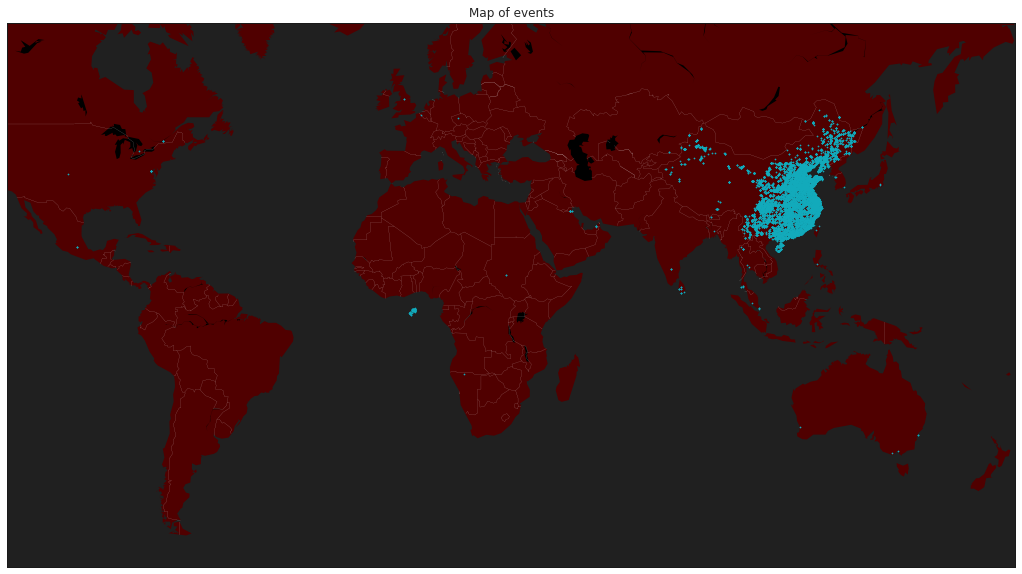

In [18]:
# Set plot
df_events_sample = df_events.sample(n=90000)
plt.figure(1, figsize=(20,10))
pd.set_option('display.max_colwidth', -1)

# Map of World
map = Basemap(projection='merc',
             llcrnrlat=-60,
             urcrnrlat=65,
             llcrnrlon=-120,
             urcrnrlon=180,
             lat_ts=0,
             resolution='c')

map.fillcontinents(color='#500000',lake_color='#000000') # grey land, black lakes
map.drawmapboundary(fill_color='#202020')                # black background
map.drawcountries(linewidth=0.1, color="w")              # white line of country borders          

# Plot the data
mxy = map(df_events_sample["longitude"].tolist(), df_events_sample["latitude"].tolist())
map.scatter(mxy[0], mxy[1], s=3, c="#12AABB", lw=0, alpha=1, zorder=5)

plt.title("Map of events")
plt.show()

As we can see some events have (lat,lon) = (0,0) which probably means that location couldn't be determined. We can find all event on that location and all events that have longitud and latitud less than 1 which means they are really close to that location. That is location is not probable since it's points to sea area close to African cost.

In [19]:
df_at0 = df_events[(df_events["longitude"]==0) & (df_events["latitude"]==0)]
df_near0 = df_events[(df_events["longitude"]>-1) &\
                     (df_events["longitude"]<1) &\
                     (df_events["latitude"]>-1) &\
                     (df_events["latitude"]<1)]

print("Total number of events:", len(df_events))
print("Number of events at (0,0):", len(df_at0))
print("Number of events near (0,0):", len(df_near0))

Total number of events: 3252950
Number of events at (0,0): 968675
Number of events near (0,0): 969871


### Locations of events - zooming in region of China

/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


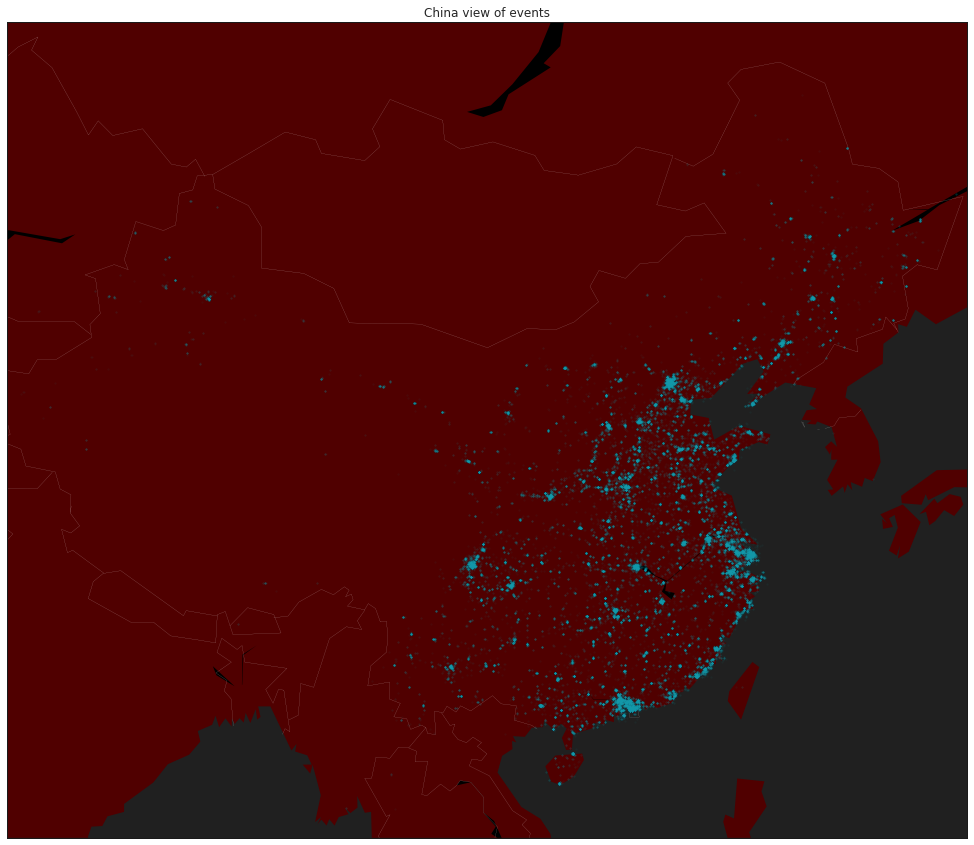

In [20]:
# Locate China region
lon_min, lon_max = 75, 135
lat_min, lat_max = 15, 55

idx_china = (df_events["longitude"]>lon_min) &\
            (df_events["longitude"]<lon_max) &\
            (df_events["latitude"]>lat_min) &\
            (df_events["latitude"]<lat_max)

df_events_china = df_events[idx_china].sample(n=100000)

# China
plt.figure(2, figsize=(20,15))

map_zoom = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')

map_zoom.fillcontinents(color='#500000',lake_color='#000000') # dark grey land, black lakes
map_zoom.drawmapboundary(fill_color='#202020')                # black background
map_zoom.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders


# Plot the data
mxy = map_zoom(df_events_china["longitude"].tolist(), df_events_china["latitude"].tolist())
map_zoom.scatter(mxy[0], mxy[1], s=5, c="#12AABB", lw=0, alpha=0.05, zorder=5)

plt.title("China view of events")
plt.show()

This map nicely shows population density of China.
We'll analyze one city region in this case we'll take Shanghai. What follows are maps that are showing longitude and latitude areas. In same way, we can zoom on any area on earth for showing more details in that area.

### Locations of applications events - region of Shanghai

/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


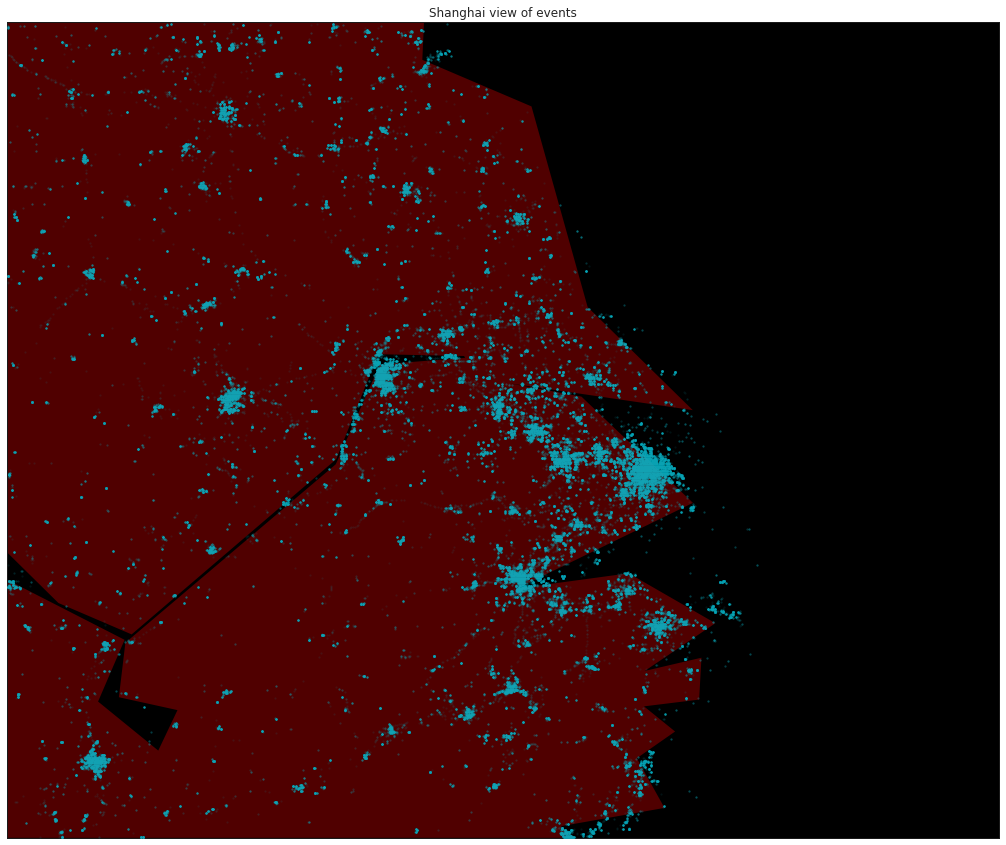

In [21]:
# Shanghai sits on 31.2304° N, 121.4737° E
# Sampling wider Shanghai region
lon_min, lon_max = 115, 125
lat_min, lat_max = 28, 35

idx_shanghai = (df_events["longitude"]>lon_min) &\
              (df_events["longitude"]<lon_max) &\
              (df_events["latitude"]>lat_min) &\
              (df_events["latitude"]<lat_max)

df_events_shanghai = df_events[idx_shanghai]

# Map of Shanghai region 
plt.figure(3, figsize=(20,15))

m_shanghai = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')

m_shanghai.fillcontinents(color='#500000',lake_color='#000000') # dark land, black lakes
m_shanghai.drawmapboundary(fill_color='#000000')                # black background
m_shanghai.drawcountries(linewidth=0.1, color="w")              # white line for country borders

# Plot the data
mxy = m_shanghai(df_events_shanghai["longitude"].tolist(), df_events_shanghai["latitude"].tolist())
m_shanghai.scatter(mxy[0], mxy[1], s=5, c="#12AABB", lw=0, alpha=0.1, zorder=5)

plt.title("Shanghai view of events")
plt.show()

We can see that population around big cities is very disperssed. 

Now we'll show male and female app events 

#### Male and female app events in region of Shanghai

In [22]:
# Load the train data and join on the events
df_train = pd.read_csv("data/gender_age_train.csv", dtype={'device_id': np.str})

df_plot = pd.merge(df_train, df_events_shanghai, on="device_id", how="inner")

df_m = df_plot[df_plot["gender"]=="M"]
df_f = df_plot[df_plot["gender"]=="F"]

Visualize male and female events in Shanghai

/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1767: MatplotlibDeprecationWarning: The get_axis_bgcolor function was deprecated in version 2.0. Use get_facecolor instead.
  axisbgc = ax.get_axis_bgcolor()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1698: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  limb = ax.axesPatch
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/ec2-user/anaconda3/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


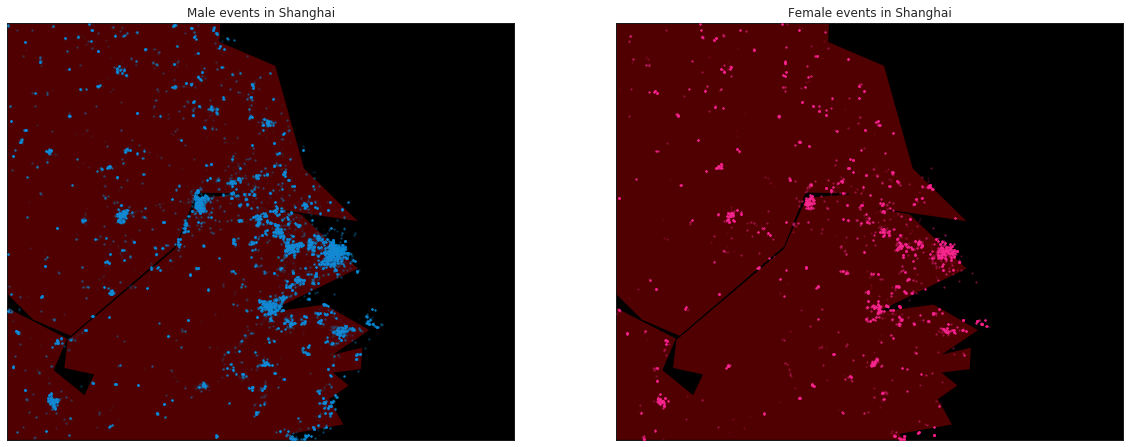

In [23]:
# Female and male plot

plt.figure(4, figsize=(20,10))

plt.subplot(121)
m_sh_m = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')
m_sh_m.fillcontinents(color='#500000',lake_color='#000000') # dark grey land, black lakes
m_sh_m.drawmapboundary(fill_color='#000000')                # black background
m_sh_m.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m_sh_m(df_m["longitude"].tolist(), df_m["latitude"].tolist())
m_sh_m.scatter(mxy[0], mxy[1], s=5, c="#1292db", lw=0, alpha=0.1, zorder=5)
plt.title("Male events in Shanghai")

plt.subplot(122)
m_sh_f = Basemap(projection='merc',
             llcrnrlat=lat_min,
             urcrnrlat=lat_max,
             llcrnrlon=lon_min,
             urcrnrlon=lon_max,
             lat_ts=35,
             resolution='c')
m_sh_f.fillcontinents(color='#500000',lake_color='#000000') # dark grey land, black lakes
m_sh_f.drawmapboundary(fill_color='#000000')                # black background
m_sh_f.drawcountries(linewidth=0.1, color="w")              # thin white line for country borders
mxy = m_sh_f(df_f["longitude"].tolist(), df_f["latitude"].tolist())
m_sh_f.scatter(mxy[0], mxy[1], s=5, c="#fd3096", lw=0, alpha=0.1, zorder=5)
plt.title("Female events in Shanghai")

plt.show()

For marketing analysis, this might be interesting for further exploration. Which city areas are showing more men activities and which are showing more female activities and in which times of day?

# Analysis

## Problem classification

Our task is to build a model predicting users’ demographic characteristics based on their app usage, geolocation, and mobile device properties. So we need to solv multiclass classification problem This is case where one label needs to be predicted based on several others. 

## Logistic regression

Logistic regression alghoritham could be obvious choice for that. In the multiclass case, the training algorithm uses the one-vs-rest (OvR) scheme. 

In [24]:
from sklearn.preprocessing import LabelEncoder
from scipy.sparse import csr_matrix, hstack
from sklearn.linear_model import LogisticRegression
from sklearn.cross_validation import StratifiedKFold
from sklearn.metrics import log_loss

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Loading of data

In [25]:
# Read gender Train and Test data
datadir = 'data'
g_a_train = pd.read_csv(os.path.join(datadir,'gender_age_train.csv'),index_col='device_id')
g_a_test = pd.read_csv(os.path.join(datadir,'gender_age_test.csv'),index_col = 'device_id')
phone = pd.read_csv(os.path.join(datadir,'phone_brand_device_model.csv'))

print(g_a_train.head())
print("---------")
print(g_a_test.head())
print("---------")
print(phone.head())

                     gender  age   group
device_id                               
-8076087639492063270  M      35   M32-38
-2897161552818060146  M      35   M32-38
-8260683887967679142  M      35   M32-38
-4938849341048082022  M      30   M29-31
 245133531816851882   M      30   M29-31
---------
Empty DataFrame
Columns: []
Index: [1002079943728939269, -1547860181818787117, 7374582448058474277, -6220210354783429585, -5893464122623104785]
---------
             device_id phone_brand   device_model
0 -8890648629457979026  小米          红米           
1  1277779817574759137  小米          MI 2         
2  5137427614288105724  三星          Galaxy S4    
3  3669464369358936369  SUGAR       时尚手机         
4 -5019277647504317457  三星          Galaxy Note 2


In [26]:
# Remove duplicate device ids in the phones
phone = phone.drop_duplicates(subset=['device_id'], keep='first').set_index('device_id')
events = pd.read_csv('data/events.csv',parse_dates=['timestamp'],index_col='event_id')
appevents = pd.read_csv('data/app_events.csv',usecols=['event_id','app_id','is_active'],dtype={'is_active':bool})
applabels = pd.read_csv('data/app_labels.csv')

/home/ec2-user/anaconda3/lib/python3.6/site-packages/numpy/lib/arraysetops.py:463: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [27]:
print(phone.head())
print("---------")
print(events.head())
print("---------")
print(appevents.head())
print("---------")
print(applabels.head())
print("---------")

                     phone_brand   device_model
device_id                                      
-8890648629457979026  小米          红米           
 1277779817574759137  小米          MI 2         
 5137427614288105724  三星          Galaxy S4    
 3669464369358936369  SUGAR       时尚手机         
-5019277647504317457  三星          Galaxy Note 2
---------
                    device_id           timestamp  longitude  latitude
event_id                                                              
1         29182687948017175   2016-05-01 00:55:25  121.38     31.24   
2        -6401643145415154744 2016-05-01 00:54:12  103.65     30.97   
3        -4833982096941402721 2016-05-01 00:08:05  106.60     29.70   
4        -6815121365017318426 2016-05-01 00:06:40  104.27     23.28   
5        -5373797595892518570 2016-05-01 00:07:18  115.88     28.66   
---------
   event_id               app_id  is_active
0  2         5927333115845830913  True     
1  2        -5720078949152207372  False    
2  2        -16

### Main feature selection

Main features chosen are: 

-  phone brand
-  device model
-  installed apps
-  app labels

We need to one-hot encode everything and put in sparse matrices which will help deal with a very large number of features. Regarding "Phone brand" feature; we'll make two columns that show which train or test set row a particular device_id belongs to.

In [28]:
g_a_train['trainr'] = np.arange(g_a_train.shape[0])
g_a_test['testr'] = np.arange(g_a_test.shape[0])

In [29]:
print(g_a_train.head())
print("---------")
print(g_a_test.head())

                     gender  age   group  trainr
device_id                                       
-8076087639492063270  M      35   M32-38  0     
-2897161552818060146  M      35   M32-38  1     
-8260683887967679142  M      35   M32-38  2     
-4938849341048082022  M      30   M29-31  3     
 245133531816851882   M      30   M29-31  4     
---------
                      testr
device_id                  
 1002079943728939269  0    
-1547860181818787117  1    
 7374582448058474277  2    
-6220210354783429585  3    
-5893464122623104785  4    


Constructing sparse matrix of features in following wasy:

csr_matrix((data, (row_ind, col_ind)), [shape=(M, N)])
where ``data``, ``row_ind`` and ``col_ind`` satisfy the
relationship ``a[row_ind[k], col_ind[k]] = data[k]``

This allows us to define what values to put into certain places in a sparse matrix. For phone brand data the data array will be all ones, row_ind will be the row number of a device and col_ind will be the number of brand.

#### Brand features

In [30]:
brand_encoder = LabelEncoder().fit(phone.phone_brand)
phone['brand'] = brand_encoder.transform(phone['phone_brand'])
g_a_train['brand'] = phone['brand']
g_a_test['brand'] = phone['brand']
Xtr_brand = csr_matrix((np.ones(g_a_train.shape[0]),(g_a_train.trainr, g_a_train.brand)))
Xte_brand = csr_matrix((np.ones(g_a_test.shape[0]),(g_a_test.testr,g_a_test.brand)))
print('Brand features: train shape {}, test shape {}'.format(Xtr_brand.shape, Xte_brand.shape))

Brand features: train shape (74645, 131), test shape (112071, 131)


#### Device model

In [31]:
phone_model = phone.phone_brand.str.cat(phone.device_model)
model_encoder = LabelEncoder().fit(phone_model)
phone['model'] = model_encoder.transform(phone_model)
g_a_train['model'] = phone['model']
g_a_test['model'] = phone['model']
Xtr_model = csr_matrix((np.ones(g_a_train.shape[0]), 
                       (g_a_train.trainr, g_a_train.model)))
Xte_model = csr_matrix((np.ones(g_a_test.shape[0]), 
                       (g_a_test.testr, g_a_test.model)))
print('Device model features: train shape {}, test shape {}'.format(Xtr_model.shape, Xte_model.shape))

Device model features: train shape (74645, 1667), test shape (112071, 1667)


#### Installed apps features

For each device we want to have list of installed applications. So we'll have as many feature columns as there are distinct apps.

Apps are linked to devices through events. So we'll do the following:

merge device_id column from events table to app_events
group the resulting dataframe by device_id and app and aggregate
merge in trainrow and testrow columns to know at which row to put each device in the features matrix

In [32]:
apps_encoder = LabelEncoder().fit(appevents.app_id)
appevents['app'] = apps_encoder.transform(appevents.app_id)
napps = len(apps_encoder.classes_)
deviceapps = (appevents.merge(events[['device_id']], how='left',left_on='event_id',right_index=True)
                       .groupby(['device_id','app'])['app'].agg(['size'])
                       .merge(g_a_train[['trainr']], how='left', left_index=True, right_index=True)
                       .merge(g_a_test[['testr']], how='left', left_index=True, right_index=True)
                       .reset_index())

In [33]:
deviceapps.head()

,device_id,app,size,trainr,testr
0,-9222956879900151005,548,18,21594.0,NaN
1,-9222956879900151005,1096,18,21594.0,NaN
2,-9222956879900151005,1248,26,21594.0,NaN
3,-9222956879900151005,1545,12,21594.0,NaN
4,-9222956879900151005,1664,18,21594.0,NaN


Next step is to build a feature matrix. Data will be all ones, row_ind comes from trainr or testr and col_ind is the label-encoded app_id.

In [34]:
dfm = deviceapps.dropna(subset=['trainr'])
Xtr_app = csr_matrix((np.ones(dfm.shape[0]), (dfm.trainr, dfm.app)), 
                      shape=(g_a_train.shape[0],napps))
dfm = deviceapps.dropna(subset=['testr'])
Xte_app = csr_matrix((np.ones(dfm.shape[0]), (dfm.testr, dfm.app)), 
                      shape=(g_a_test.shape[0],napps))
print('Apps data: train shape {}, test shape {}'.format(Xtr_app.shape, Xte_app.shape))

Apps data: train shape (74645, 19237), test shape (112071, 19237)


#### App labels features

We can create app labels merging app_labels with the deviceapps dataframe.

In [35]:
applabels = applabels.loc[applabels.app_id.isin(appevents.app_id.unique())]
applabels['app'] = apps_encoder.transform(applabels.app_id)
labelencoder = LabelEncoder().fit(applabels.label_id)
applabels['label'] = labelencoder.transform(applabels.label_id)
nlabels = len(labelencoder.classes_)

In [36]:
devicelabels = (deviceapps[['device_id','app']]
                .merge(applabels[['app','label']])
                .groupby(['device_id','label'])['app'].agg(['size'])
                .merge(g_a_train[['trainr']], how='left', left_index=True, right_index=True)
                .merge(g_a_test[['testr']], how='left', left_index=True, right_index=True)
                .reset_index())

In [37]:
devicelabels.head()

,device_id,label,size,trainr,testr
0,-9222956879900151005,117,1,21594.0,NaN
1,-9222956879900151005,120,1,21594.0,NaN
2,-9222956879900151005,126,1,21594.0,NaN
3,-9222956879900151005,138,2,21594.0,NaN
4,-9222956879900151005,147,2,21594.0,NaN


In [38]:
dfm = devicelabels.dropna(subset=['trainr'])
Xtr_label = csr_matrix((np.ones(dfm.shape[0]), (dfm.trainr, dfm.label)), 
                      shape=(g_a_train.shape[0],nlabels))
dfm = devicelabels.dropna(subset=['testr'])
Xte_label = csr_matrix((np.ones(dfm.shape[0]), (dfm.testr, dfm.label)), 
                      shape=(g_a_test.shape[0],nlabels))
print('Labels data: train shape {}, test shape {}'.format(Xtr_label.shape, Xte_label.shape))

Labels data: train shape (74645, 492), test shape (112071, 492)


Features concatenation

In [39]:
Xtrain = hstack((Xtr_brand, Xtr_model, Xtr_app, Xtr_label), format='csr')
Xtest =  hstack((Xte_brand, Xte_model, Xte_app, Xte_label), format='csr')
print('All features: train shape {}, test shape {}'.format(Xtrain.shape, Xtest.shape))

All features: train shape (74645, 21527), test shape (112071, 21527)


### Performing cross-validation

In [40]:
targ_encoder = LabelEncoder().fit(g_a_train.group)
y = targ_encoder.transform(g_a_train.group)
nclasses = len(targ_encoder.classes_)

In [42]:
# Defining loss- score function
def score(clf, random_state = 0):
    kf = StratifiedKFold(y, n_folds=5, shuffle=True, random_state=random_state)
    pred = np.zeros((y.shape[0],nclasses))
    for itrain, itest in kf:
        Xtr, Xte = Xtrain[itrain, :], Xtrain[itest, :]
        ytr, yte = y[itrain], y[itest]
        clf.fit(Xtr, ytr)
        pred[itest,:] = clf.predict_proba(Xte)
        
        # Resize to one fold (for kernels)
        return log_loss(yte, pred[itest, :])
        print("{:.5f}".format(log_loss(yte, pred[itest,:])), end=' ')
    print('')
    return log_loss(y, pred)

We've tested values for regularization constant C. Since there is probably a lot of columns which are not so important (rare apps or models of brands) we are probably going to get better score with stronger regularization which means that C value will probably going to be below 1.

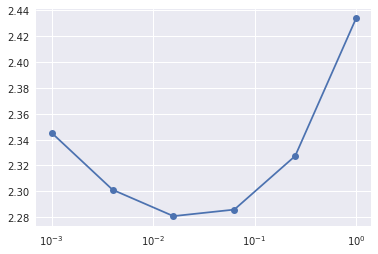

In [43]:
cvalue = np.logspace(-3,0,6)
res = []
for C in cvalue:
    res.append(score(LogisticRegression(C = C)))
plt.semilogx(cvalue, res,'-o');

So it looks like the best value for C could between 0.01 and 0.1.

In [44]:
score(LogisticRegression(C=0.01))

2.2848755470140127

In [45]:
score(LogisticRegression(C=0.02))

2.2797068236722908

In [46]:
score(LogisticRegression(C=0.03))

2.2796060828323981

In [47]:
score(LogisticRegression(C=0.04))

2.2809556715503021

In [48]:
score(LogisticRegression(C=0.05))

2.2828903616369471

LogisticRegression classifier solves multiclass classification problem -in form of one versus rest fashion. But we can also fit a multinomial model that optimizes the multiclass logloss like in our case. We could improve results using this scenario since this is our exact setup.

In [49]:
score(LogisticRegression(C=0.02, multi_class='multinomial',solver='saga'))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2.2733463394827584

In [50]:
score(LogisticRegression(C=0.02, multi_class='multinomial',solver='lbfgs'))

2.273326572493398

In [51]:
score(LogisticRegression(C=0.02, multi_class='multinomial',solver='newton-cg'))

2.2731559680466482

In [52]:
score(LogisticRegression(C=0.02, multi_class='multinomial',solver='sag'))

/home/ec2-user/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/sag.py:326: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


2.2731581798416354

# Benchmark comparison - Test dataset with XGBoost


In [3]:
import datetime
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
import xgboost as xgb
import random
import zipfile
import time
import shutil
from sklearn.metrics import log_loss

random.seed(2016)

def run_xgb(train, test, features, target, random_state=0):
    eta = 0.1
    max_depth = 3
    subsample = 0.7
    colsample_bytree = 0.7
    start_time = time.time()

    print('XGBoost params. ETA: {}, MAX_DEPTH: {}, SUBSAMPLE: {}, COLSAMPLE_BY_TREE: {}'.format(eta, max_depth, subsample, colsample_bytree))
    params = {
        "objective": "multi:softprob",
        "num_class": 12,
        "booster" : "gbtree",
        "eval_metric": "mlogloss",
        "eta": eta,
        "max_depth": max_depth,
        "subsample": subsample,
        "colsample_bytree": colsample_bytree,
        "silent": 1,
        "seed": random_state,
    }
    num_boost_round = 500
    early_stopping_rounds = 50
    test_size = 0.3

    X_train, X_valid = train_test_split(train, test_size=test_size, random_state=random_state)
    print('Length train:', len(X_train.index))
    print('Length valid:', len(X_valid.index))
    y_train = X_train[target]
    y_valid = X_valid[target]
    dtrain = xgb.DMatrix(X_train[features], y_train)
    dvalid = xgb.DMatrix(X_valid[features], y_valid)

    watchlist = [(dtrain, 'train'), (dvalid, 'eval')]
    gbm = xgb.train(params, dtrain, num_boost_round, evals=watchlist, early_stopping_rounds=early_stopping_rounds, verbose_eval=True)

    print("Validating...")
    check = gbm.predict(xgb.DMatrix(X_valid[features]), ntree_limit=gbm.best_iteration)
    score = log_loss(y_valid.tolist(), check)

    print("Predict test set...")
    test_prediction = gbm.predict(xgb.DMatrix(test[features]), ntree_limit=gbm.best_iteration)

    print('Training time: {} minutes'.format(round((time.time() - start_time)/60, 2)))
    return test_prediction.tolist(), score


def create_submission(score, test, prediction):
    # Make Submission
    now = datetime.datetime.now()
    sub_file = 'submission_' + str(score) + '_' + str(now.strftime("%Y-%m-%d-%H-%M")) + '.csv'
    print('Writing submission: ', sub_file)
    f = open(sub_file, 'w')
    f.write('device_id,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+\n')
    total = 0
    test_val = test['device_id'].values
    for i in range(len(test_val)):
        str1 = str(test_val[i])
        for j in range(12):
            str1 += ',' + str(prediction[i][j])
        str1 += '\n'
        total += 1
        f.write(str1)
    f.close()


def map_column(table, f):
    labels = sorted(table[f].unique())
    mappings = dict()
    for i in range(len(labels)):
        mappings[labels[i]] = i
    table = table.replace({f: mappings})
    return table


def read_train_test():
    # Events
    print('Read events data')
    events = pd.read_csv("data/events.csv", dtype={'device_id': np.str})
    events['counts'] = events.groupby(['device_id'])['event_id'].transform('count')
    events_small = events[['device_id', 'counts']].drop_duplicates('device_id', keep='first')

    # Phone brand
    print('Read brands data')
    pbd = pd.read_csv("data/phone_brand_device_model.csv", dtype={'device_id': np.str})
    pbd.drop_duplicates('device_id', keep='first', inplace=True)
    pbd = map_column(pbd, 'phone_brand')
    pbd = map_column(pbd, 'device_model')

    # Train
    print('Read training data')
    train = pd.read_csv("data/gender_age_train.csv", dtype={'device_id': np.str})
    train = map_column(train, 'group')
    train = train.drop(['age'], axis=1)
    train = train.drop(['gender'], axis=1)
    train = pd.merge(train, pbd, how='left', on='device_id', left_index=True)
    train = pd.merge(train, events_small, how='left', on='device_id', left_index=True)
    train.fillna(-1, inplace=True)

    # Test
    print('Read test data')
    test = pd.read_csv("data/gender_age_test.csv", dtype={'device_id': np.str})
    test = pd.merge(test, pbd, how='left', on='device_id', left_index=True)
    test = pd.merge(test, events_small, how='left', on='device_id', left_index=True)
    test.fillna(-1, inplace=True)

    # Features
    features = list(test.columns.values)
    features.remove('device_id')

    return train, test, features


train, test, features = read_train_test()
print('Length of train: ', len(train))
print('Length of test: ', len(test))
print('Features [{}]: {}'.format(len(features), sorted(features)))
test_prediction, score = run_xgb(train, test, features, 'group')
print("LS: {}".format(round(score, 5)))
create_submission(score, test, test_prediction)

Read events data
Read brands data
Read training data
Read test data
Length of train:  74645
Length of test:  112071
Features [3]: ['counts', 'device_model', 'phone_brand']
XGBoost params. ETA: 0.1, MAX_DEPTH: 3, SUBSAMPLE: 0.7, COLSAMPLE_BY_TREE: 0.7
Length train: 52251
Length valid: 22394
[0]	train-mlogloss:2.47571	eval-mlogloss:2.47616
Multiple eval metrics have been passed: 'eval-mlogloss' will be used for early stopping.

Will train until eval-mlogloss hasn't improved in 50 rounds.
[1]	train-mlogloss:2.46755	eval-mlogloss:2.46858
[2]	train-mlogloss:2.46021	eval-mlogloss:2.46177
[3]	train-mlogloss:2.45349	eval-mlogloss:2.45551
[4]	train-mlogloss:2.4475	eval-mlogloss:2.44996
[5]	train-mlogloss:2.4422	eval-mlogloss:2.44512
[6]	train-mlogloss:2.43738	eval-mlogloss:2.44074
[7]	train-mlogloss:2.43297	eval-mlogloss:2.43675
[8]	train-mlogloss:2.42895	eval-mlogloss:2.43312
[9]	train-mlogloss:2.42525	eval-mlogloss:2.42983
[10]	train-mlogloss:2.42203	eval-mlogloss:2.42711
[11]	train-mlogloss:

[155]	train-mlogloss:2.36125	eval-mlogloss:2.39694
[156]	train-mlogloss:2.36109	eval-mlogloss:2.39695
[157]	train-mlogloss:2.36094	eval-mlogloss:2.39694
[158]	train-mlogloss:2.36083	eval-mlogloss:2.39694
[159]	train-mlogloss:2.36066	eval-mlogloss:2.39695
[160]	train-mlogloss:2.36048	eval-mlogloss:2.39693
[161]	train-mlogloss:2.36034	eval-mlogloss:2.39697
[162]	train-mlogloss:2.36019	eval-mlogloss:2.397
[163]	train-mlogloss:2.36004	eval-mlogloss:2.39697
[164]	train-mlogloss:2.35991	eval-mlogloss:2.39692
[165]	train-mlogloss:2.35969	eval-mlogloss:2.39686
[166]	train-mlogloss:2.35956	eval-mlogloss:2.39684
[167]	train-mlogloss:2.35937	eval-mlogloss:2.39677
[168]	train-mlogloss:2.35923	eval-mlogloss:2.39677
[169]	train-mlogloss:2.3591	eval-mlogloss:2.39674
[170]	train-mlogloss:2.35895	eval-mlogloss:2.39674
[171]	train-mlogloss:2.3588	eval-mlogloss:2.39678
[172]	train-mlogloss:2.35865	eval-mlogloss:2.39673
[173]	train-mlogloss:2.35851	eval-mlogloss:2.39672
[174]	train-mlogloss:2.35834	eval-m

### Test data predictions - LogisticRegression

In [52]:
clf = LogisticRegression(C=0.02, multi_class='multinomial',solver='lbfgs')
clf.fit(Xtrain, y)
pred = pd.DataFrame(clf.predict_proba(Xtest), index = g_a_test.index, columns=targ_encoder.classes_)

In [53]:
pred.head()

,F23-,F24-26,F27-28,F29-32,F33-42,F43+,M22-,M23-26,M27-28,M29-31,M32-38,M39+
device_id,,,,,,,,,,,,
1002079943728939269,0.001424,0.005998,0.013605,0.013286,0.025313,0.046103,0.011815,0.033501,0.074615,0.121405,0.260537,0.392400
-1547860181818787117,0.007414,0.013299,0.031228,0.058677,0.072686,0.151391,0.006009,0.091906,0.054989,0.077066,0.229204,0.206130
7374582448058474277,0.023158,0.036713,0.036233,0.158343,0.162774,0.079852,0.012986,0.026441,0.043571,0.104941,0.181501,0.133486
-6220210354783429585,0.003474,0.030860,0.008801,0.012351,0.050697,0.172943,0.048150,0.139719,0.073499,0.093593,0.179861,0.186053
-5893464122623104785,0.046952,0.065640,0.042578,0.062522,0.056329,0.043467,0.090625,0.165219,0.097877,0.102350,0.132938,0.093503


Storing best predictions in CSV file

In [54]:
pred.to_csv('predictions.csv',index=True)

# Free form data visualizations


Reading app events...
Reading events...
Making events features...
Reading phone brands...
Reading train data...
Merging features with train data...
Reading test data...
Merging features with test data...

Length of train:  74645
Length of test:  112071
Features [5]: ['active', 'counts', 'device_model', 'installed', 'phone_brand']

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 7465 samples in 0.024s...
[t-SNE] Computed neighbors for 7465 samples in 0.180s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7465
[t-SNE] Computed conditional probabilities for sample 2000 / 7465
[t-SNE] Computed conditional probabilities for sample 3000 / 7465
[t-SNE] Computed conditional probabilities for sample 4000 / 7465
[t-SNE] Computed conditional probabilities for sample 5000 / 7465
[t-SNE] Computed conditional probabilities for sample 6000 / 7465
[t-SNE] Computed conditional probabilities for sample 7000 / 7465
[t-SNE] Computed conditional probabilities for sample 7465 / 74

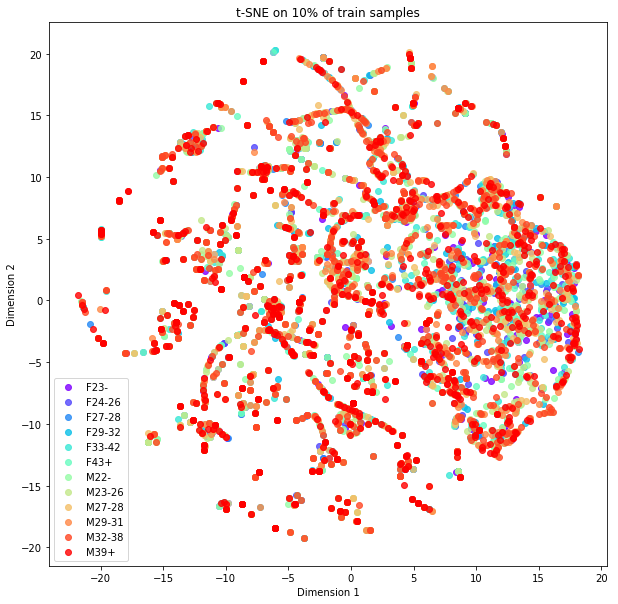

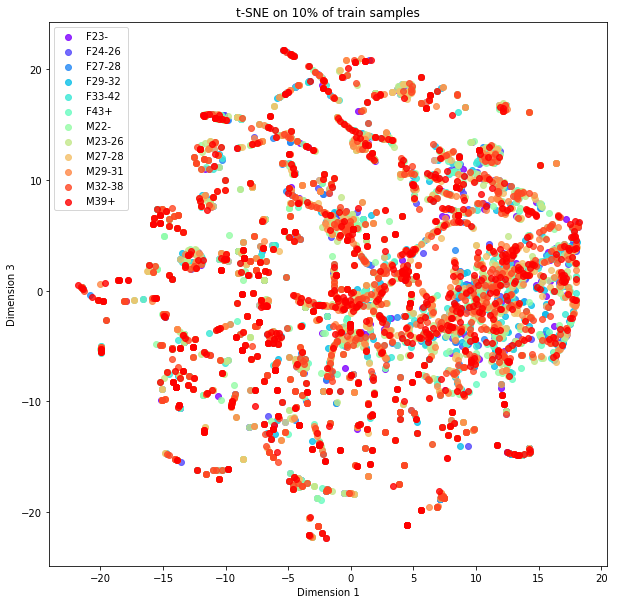

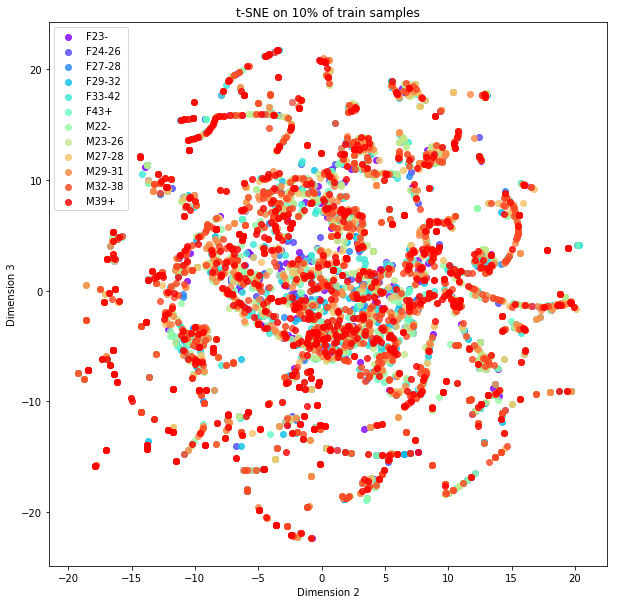

In [4]:
__author__ = 'ZFTurbo: https://kaggle.com/zfturbo'
__author__ = 'tilii: https://kaggle.com/tilii7'

# ZFTurbo defined first 3 features
# tilii added two new features and t-SNE clustering & visualization
# used some ideas from https://www.kaggle.com/cast42/santander-customer-satisfaction/t-sne-manifold-visualisation/code

import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn import manifold
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.preprocessing import normalize
import matplotlib.pyplot as plt
import matplotlib.cm as cm


def run_tsne(train, target):
    sss = StratifiedShuffleSplit(target, test_size=0.1)
    for train_index, test_index in sss:
        break

    X_train, X_valid = train[train_index], train[test_index]
    Y_train, Y_valid = target[train_index], target[test_index]

    train_norm = normalize(X_valid, axis=0)
    tsne = manifold.TSNE(n_components=3,
                         init='pca',
                         random_state=101,
                         method='barnes_hut',
                         n_iter=500,
                         verbose=2)
    train_tsne = tsne.fit_transform(train_norm)
    return (train_tsne, Y_valid)


def tsne_vis(tsne_data, tsne_groups):
    colors = cm.rainbow(np.linspace(0, 1, 12))
    labels = ['F23-', 'F24-26', 'F27-28', 'F29-32', 'F33-42', 'F43+', 'M22-',
              'M23-26', 'M27-28', 'M29-31', 'M32-38', 'M39+']

    plt.figure(figsize=(10, 10))
    for l, c, co, in zip(labels, colors, range(12)):
        plt.scatter(tsne_data[np.where(tsne_groups == co), 0],
                    tsne_data[np.where(tsne_groups == co), 1],
                    marker='o',
                    color=c,
                    linewidth='1',
                    alpha=0.8,
                    label=l)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 2')
    plt.title('t-SNE on 10% of train samples')
    plt.legend(loc='best')
    plt.savefig('rainbow-01.png')
    plt.show(block=False)

    plt.figure(figsize=(10, 10))
    for l, c, co, in zip(labels, colors, range(12)):
        plt.scatter(tsne_data[np.where(tsne_groups == co), 0],
                    tsne_data[np.where(tsne_groups == co), 2],
                    marker='o',
                    color=c,
                    linewidth='1',
                    alpha=0.8,
                    label=l)
    plt.xlabel('Dimension 1')
    plt.ylabel('Dimension 3')
    plt.title('t-SNE on 10% of train samples')
    plt.legend(loc='best')
    plt.savefig('rainbow-02.png')
    plt.show(block=False)

    plt.figure(figsize=(10, 10))
    for l, c, co, in zip(labels, colors, range(12)):
        plt.scatter(tsne_data[np.where(tsne_groups == co), 1],
                    tsne_data[np.where(tsne_groups == co), 2],
                    marker='o',
                    color=c,
                    linewidth='1',
                    alpha=0.8,
                    label=l)
    plt.xlabel('Dimension 2')
    plt.ylabel('Dimension 3')
    plt.title('t-SNE on 10% of train samples')
    plt.legend(loc='best')
    plt.savefig('rainbow-03.png')
    plt.show(block=False)


def map_column(table, f):
    labels = sorted(table[f].unique())
    mappings = dict()
    for i in range(len(labels)):
        mappings[labels[i]] = i
    table = table.replace({f: mappings})
    return table


def read_train_test():
    # App events
    print('\nReading app events...')
    ape = pd.read_csv('data/app_events.csv')
    ape['installed'] = ape.groupby(
        ['event_id'])['is_installed'].transform('sum')
    ape['active'] = ape.groupby(
        ['event_id'])['is_active'].transform('sum')
    ape.drop(['is_installed', 'is_active'], axis=1, inplace=True)
    ape.drop_duplicates('event_id', keep='first', inplace=True)
    ape.drop(['app_id'], axis=1)

    # Events
    print('Reading events...')
    events = pd.read_csv('data/events.csv', dtype={'device_id': np.str})
    events['counts'] = events.groupby(
        ['device_id'])['event_id'].transform('count')

    print('Making events features...')
    # The idea here is to count the number of installed apps using the data
    # from app_events.csv above. Also to count the number of active apps.
    events = pd.merge(events, ape, how='left', on='event_id', left_index=True)

    # Below is the original events_small table
    # events_small = events[['device_id', 'counts']].drop_duplicates('device_id', keep='first')
    # And this is the new events_small table with two extra features
    events_small = events[['device_id', 'counts', 'installed',
                           'active']].drop_duplicates('device_id',
                                              keep='first')

    # Phone brand
    print('Reading phone brands...')
    pbd = pd.read_csv('data/phone_brand_device_model.csv',
                      dtype={'device_id': np.str})
    pbd.drop_duplicates('device_id', keep='first', inplace=True)
    pbd = map_column(pbd, 'phone_brand')
    pbd = map_column(pbd, 'device_model')

    # Train
    print('Reading train data...')
    train = pd.read_csv('data/gender_age_train.csv',
                        dtype={'device_id': np.str})
    train = map_column(train, 'group')
    train = train.drop(['age'], axis=1)
    train = train.drop(['gender'], axis=1)
    print('Merging features with train data...')
    train = pd.merge(train, pbd, how='left', on='device_id', left_index=True)
    train = pd.merge(train,
                     events_small,
                     how='left',
                     on='device_id',
                     left_index=True)
    train.fillna(-1, inplace=True)

    # Test
    print('Reading test data...')
    test = pd.read_csv('data/gender_age_test.csv',
                       dtype={'device_id': np.str})
    print('Merging features with test data...\n')
    test = pd.merge(test, pbd, how='left', on='device_id', left_index=True)
    test = pd.merge(test,
                    events_small,
                    how='left',
                    on='device_id',
                    left_index=True)
    test.fillna(-1, inplace=True)

    # Features
    features = list(test.columns.values)
    features.remove('device_id')
    return train, test, features


train, test, features = read_train_test()
print('Length of train: ', len(train))
print('Length of test: ', len(test))
print('Features [{}]: {}\n'.format(len(features), sorted(features)))
train_df = pd.DataFrame(data=train)
X = train_df.drop(['group', 'device_id'], axis=1).values
Y = train_df['group'].values
tsne_data, tsne_groups = run_tsne(X, Y)
tsne_vis(tsne_data, tsne_groups)